# Data Loading

## Importing Necessary Libraries

In [138]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

**Loading the MNIST dataset for handwritten digit classification from datasets present in keras library**

In [66]:
# Loading the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [67]:
# Shape of Training and Testing data
print("Shape of x_train: ",x_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (60000, 28, 28)
Shape of y_train:  (60000,)
Shape of x_test:  (10000, 28, 28)
Shape of y_test:  (10000,)


# Visualization

### Visualizing the Training data

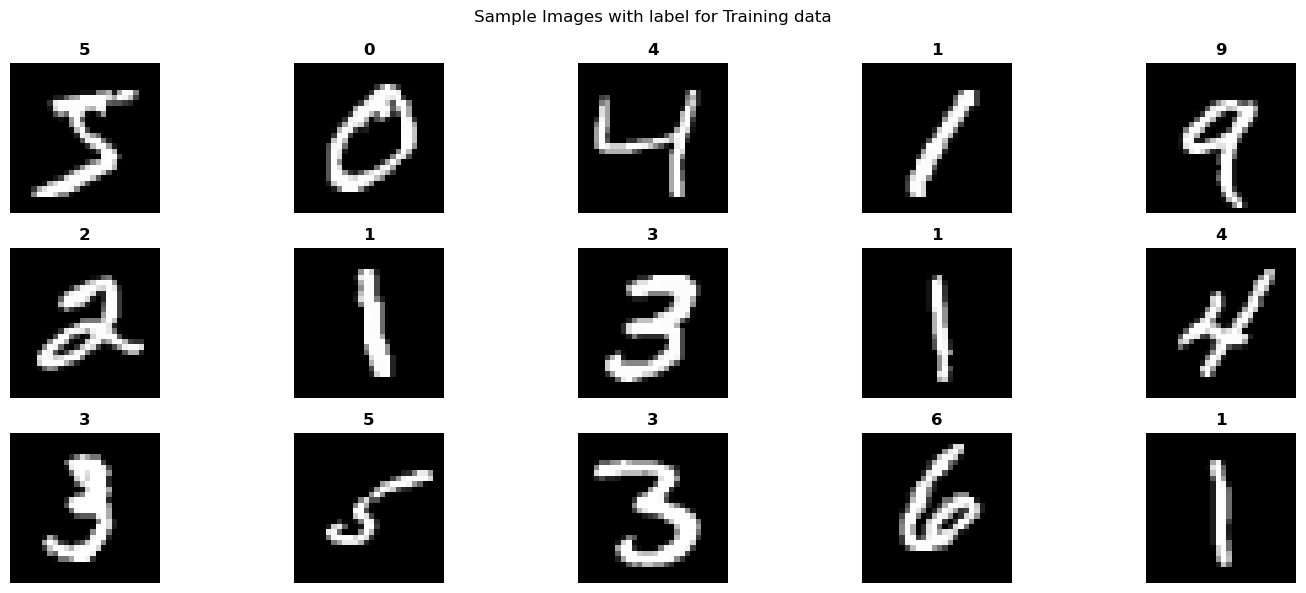

In [68]:
fig,axes = plt.subplots(3,5,figsize=(15,6))
fig.suptitle("Sample Images with label for Training data")
for i,ax_row in enumerate(axes):
    for j, ax in enumerate(ax_row):
        index = i*5+j
        ax.imshow(x_train[index],cmap='gray')
        ax.set_title(y_train[index], fontsize=12, weight="bold")
        ax.axis('off')

plt.tight_layout()
plt.show()

### Visualizing the Testing data

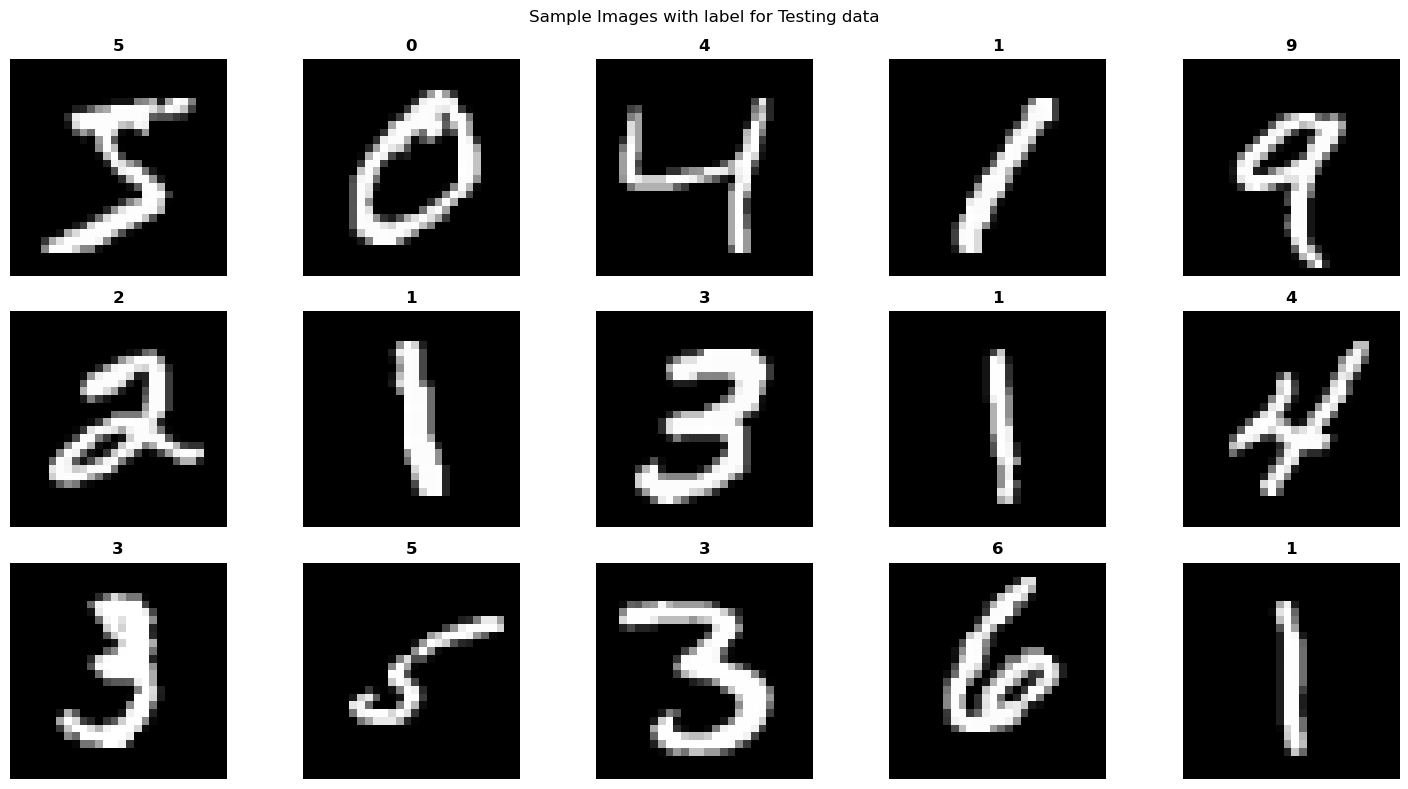

In [69]:
fig,axes = plt.subplots(3,5,figsize=(15,8))
fig.suptitle("Sample Images with label for Testing data")
for i, ax_row in enumerate(axes):
    for j,ax in enumerate(ax_row):
        index = i*5+j
        ax.imshow(x_train[index],cmap='gray')
        ax.set_title(y_train[index], fontsize=12, weight='bold')
        ax.axis('off')
plt.tight_layout()
plt.show()

# Data Preprocessing

In [70]:
x_test = x_test/255
x_train = x_train/255

In [71]:
x_train_flattened = x_train.reshape(len(x_train),28,28)
x_test_flattened = x_test.reshape(len(x_test),28,28)

In [100]:
x_train_flattened.shape

(60000, 28, 28)

In [101]:
x_test_flattened.shape

(10000, 28, 28)

# Model Building

# LeNet Architecture

In [105]:
model= Sequential([
    Conv2D(6, (5,5), strides=(1,1), input_shape=(28,28,1), activation='relu'),
    MaxPooling2D((2,2), strides=(2,2)),
    Conv2D(16, (5,5), strides = (1,1), activation='relu'),
    MaxPooling2D((2,2),strides=(2,2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [106]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3, 
    verbose=1,
    restore_best_weights = True
)

In [107]:
history = model.fit(x_train,y_train, batch_size=16, validation_data = (x_test,y_test),epochs=10, callbacks = [early_stopping])

Epoch 1/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8937 - loss: 0.3418 - val_accuracy: 0.9814 - val_loss: 0.0644
Epoch 2/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9801 - loss: 0.0640 - val_accuracy: 0.9826 - val_loss: 0.0562
Epoch 3/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9861 - loss: 0.0459 - val_accuracy: 0.9852 - val_loss: 0.0484
Epoch 4/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9897 - loss: 0.0343 - val_accuracy: 0.9832 - val_loss: 0.0544
Epoch 5/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9913 - loss: 0.0272 - val_accuracy: 0.9872 - val_loss: 0.0418
Epoch 6/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9932 - loss: 0.0212 - val_accuracy: 0.9873 - val_loss: 0.0427
Epoch 7/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9939 - loss: 0.0191 - val_accuracy: 0.9873 - val_loss: 0.0460
Epoch 8/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9948 - loss: 0.0164 - 

# Model Evaluation

In [108]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.9868 - loss: 0.0550


[0.04073371738195419, 0.9898999929428101]

### Prediction of single image

In [124]:
input_image = x_test_flattened.reshape(-1,28,28,1)

In [125]:
pred = model.predict(input_image)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [126]:
prediction = [np.argmax(i) for i in pred]

**Heatmapt of correct and incorrect predictions**

In [129]:
cm = tf.math.confusion_matrix(y_test, predictions = prediction)

Text(0.5, 1.0, 'Heatmap of prediction')

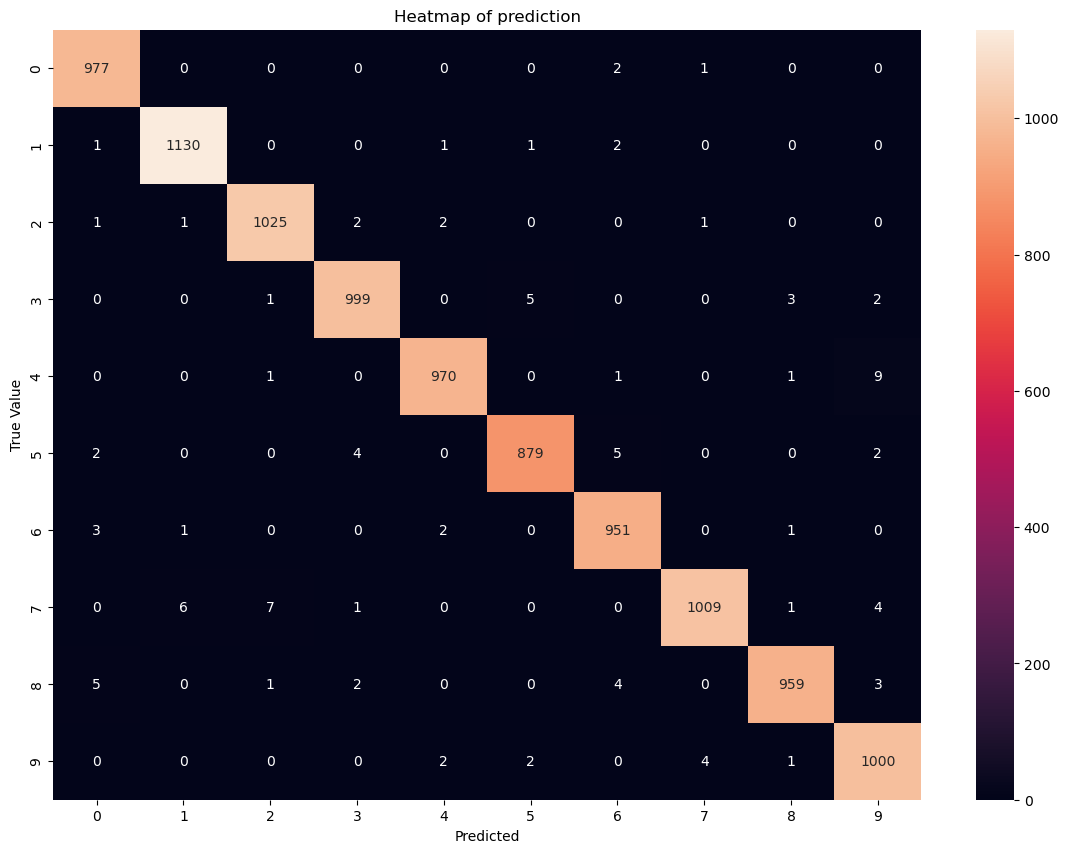

In [137]:
plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True Value")
plt.title("Heatmap of prediction")

In [139]:
cl = classification_report(y_test, prediction)

In [141]:
print(cl)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [142]:
model.save('lesnet_digit.h5')